In [5]:
## Packages
'''Import all the necessary packages and modules'''

import numpy as np # package for playing with matrices
import matplotlib.pyplot as plt
import sys, os # python modules for interacting with computer
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter 
import pandas as pd # useful for keeping cell structure and 2d data manipulation
import glob # helps find path 

In [6]:
## Data Directory GUI
'''Getting data directory so data can easily be imported 
using this format data = hs.load('*.dm3', stack=True) to import all dm3s in folder as a stack'''

root = Tk() # Tk() is a function in tkinter that opens a window
root.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
#root.file = fieldialog.askopenfilename()
root.withdraw() # closes the tkinter window since it's unnecessary
oldcwd = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
os.chdir(root.directory) # sets new directory
newcwd = os.getcwd() # saves new directory name as newcwd

In [7]:
## Load Data
''' Open data and set up for analysis'''
path = root.directory + '/*.s1p' # creates path to data set folder directory. Change .csv to file type as needed
a=0 # counter for looping through list starting at 0
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
Header = 4 #Removes string header to work with numpy array
file_shape = np.array(pd.read_csv(glob.glob(path)[0],sep=" ", header=4).values.shape) # data file size
file_shape[0]=file_shape[0] # new file shape after removal of header
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname, sep=" ", header=Header) # uses pandas to open files and keep structure
    #data=data.drop(data.index[END-Header:END]) #Removes rows of header
    datapd = data.values # converts from dataframe to numpy array
    
    data_array[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list
    

In [8]:
file_list

['C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\CableBaseline.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port1.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port2.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port3.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port4.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port5.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port6.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port7.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip2Port2.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip2Port3.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip2Port4.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Bia

In [9]:
for_counter = np.arange(data_array.shape[2]-1)+1
cable_data_matrix=data_array.shape
a=0
data_A=np.empty(cable_data_matrix)

for counter in for_counter:

    data_A[:,1,a]=data_array[:,1,counter]-data_array[:,1,0]
    a+=1


C:\Users\kbs1\AppData\Local\Continuum\anaconda3\envs\HyperSpy\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


IndexError: index 28 is out of bounds for axis 2 with size 28

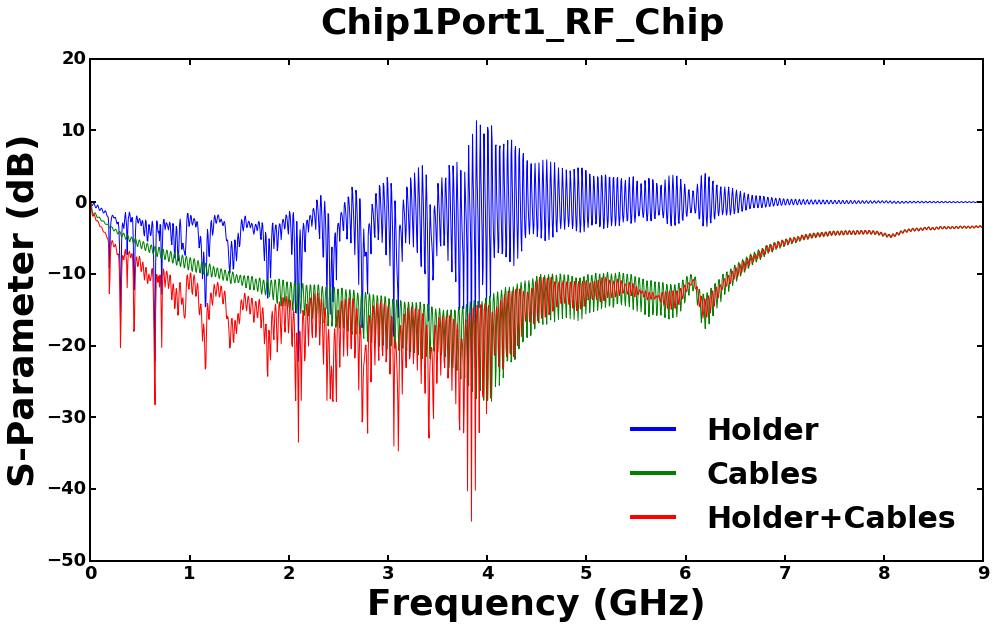

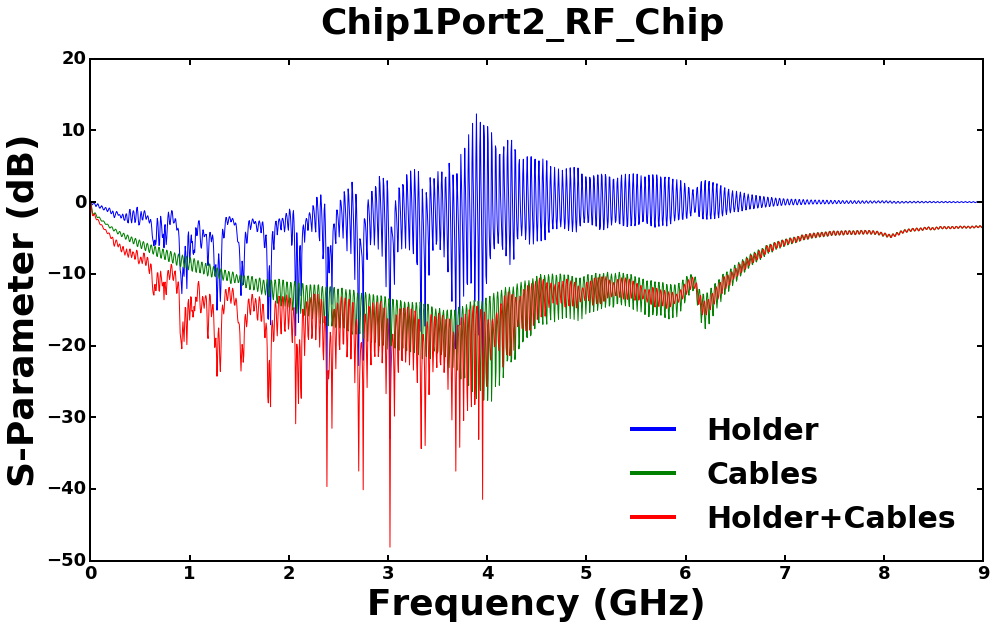

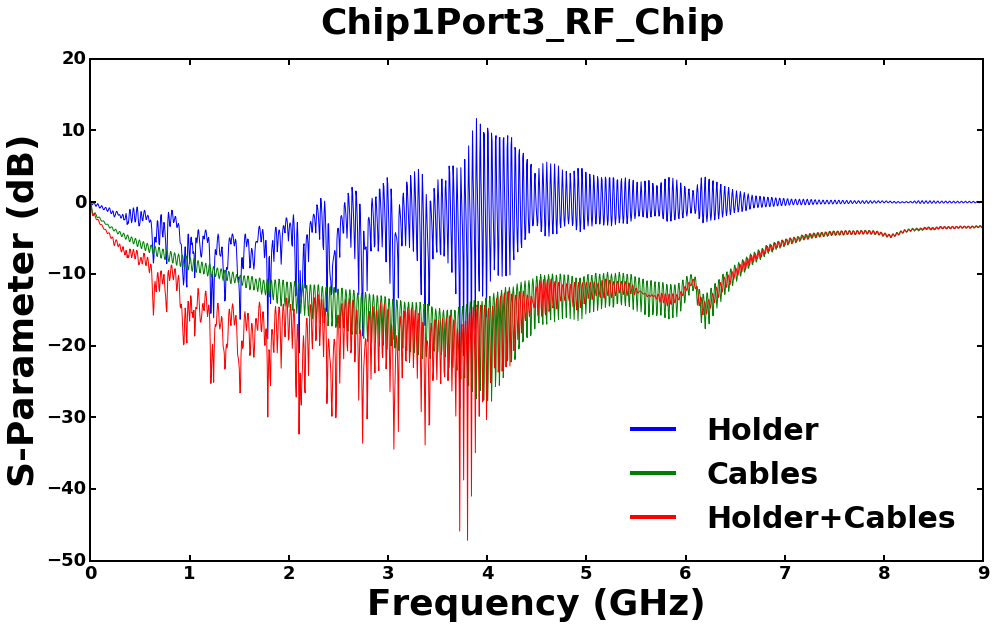

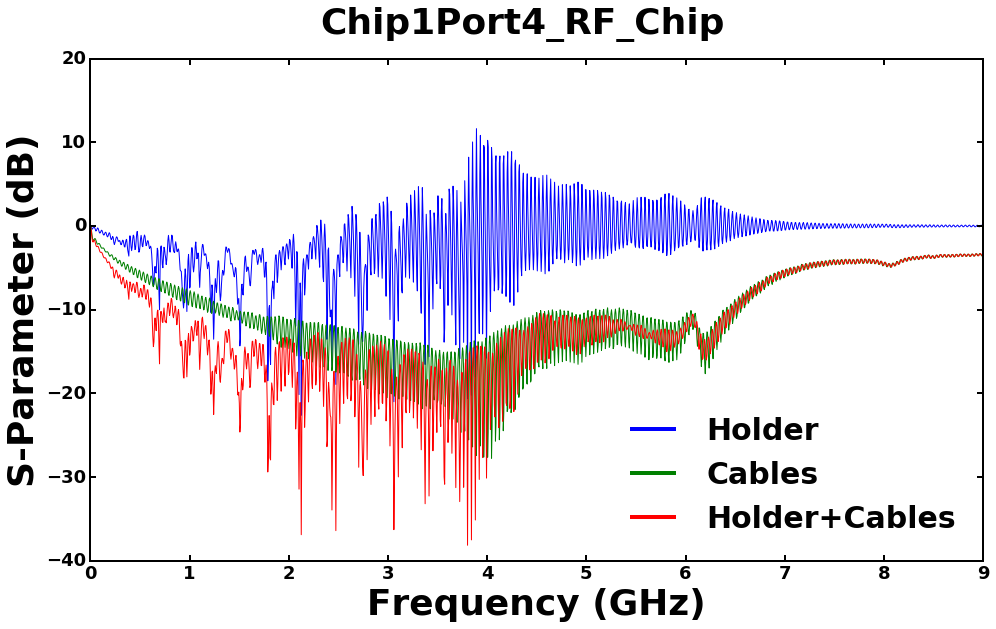

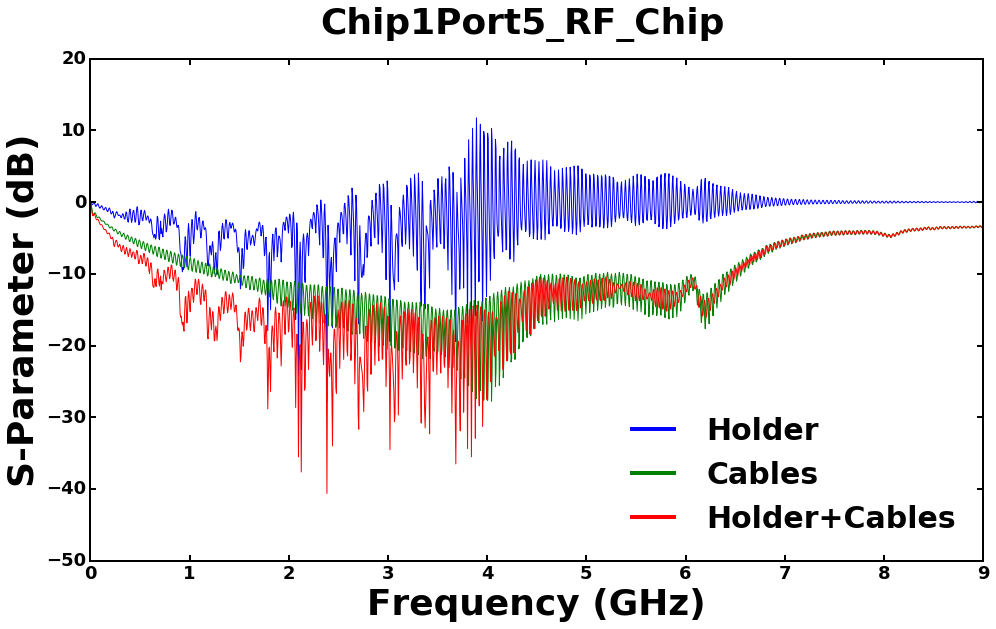

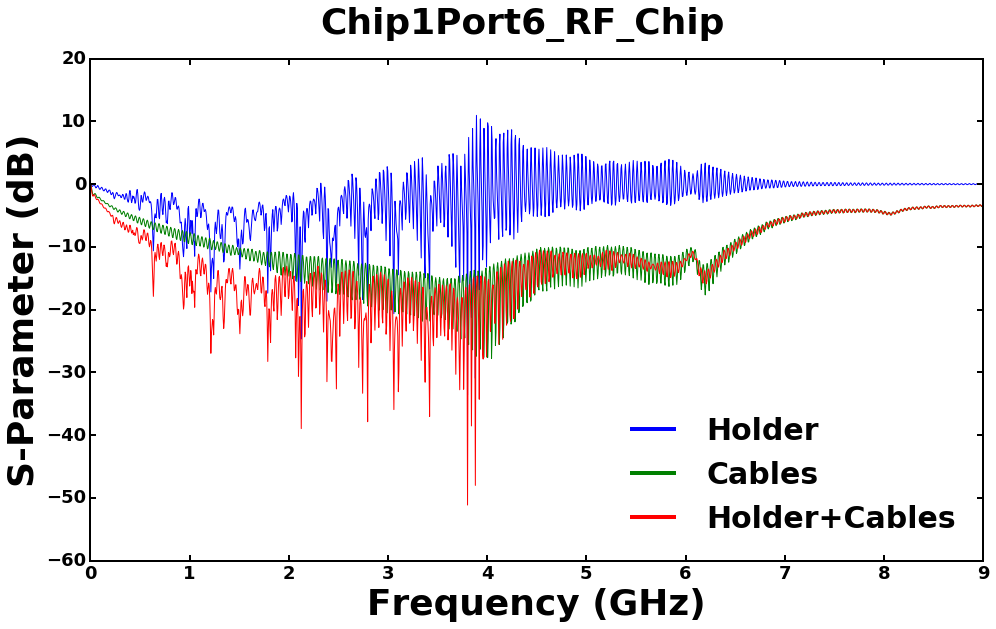

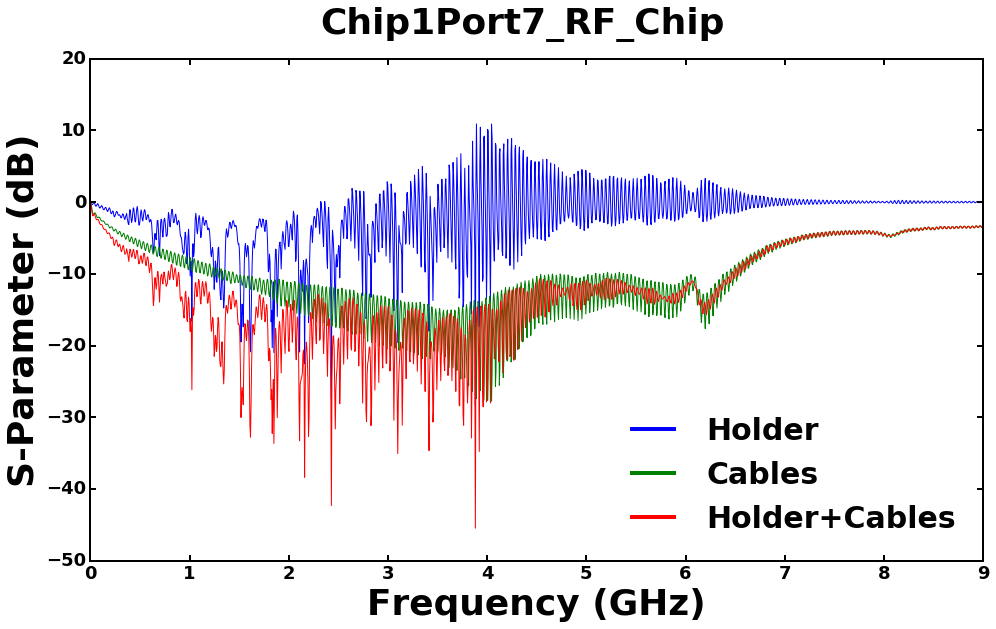

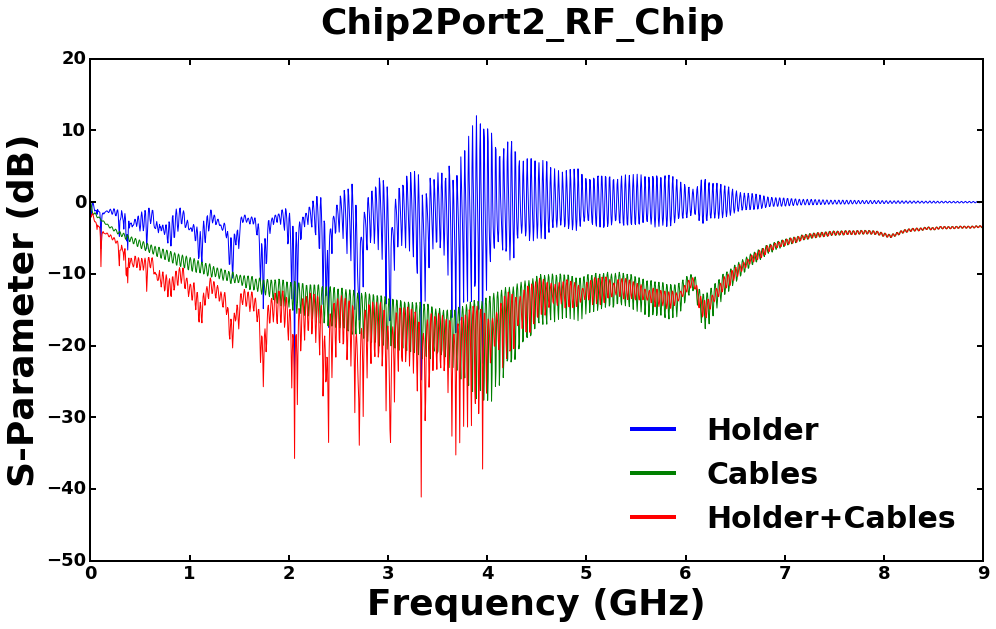

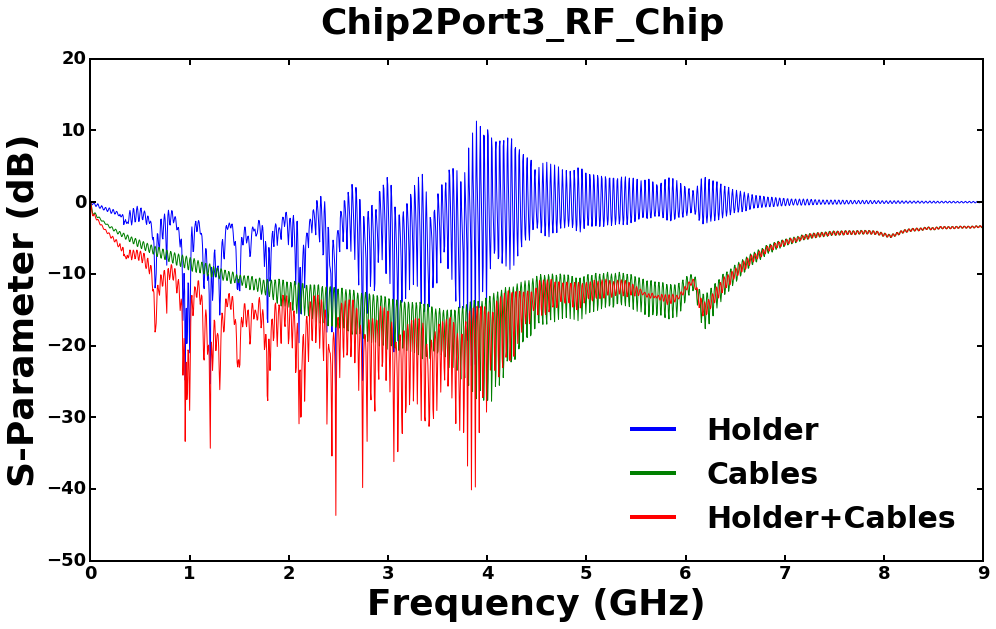

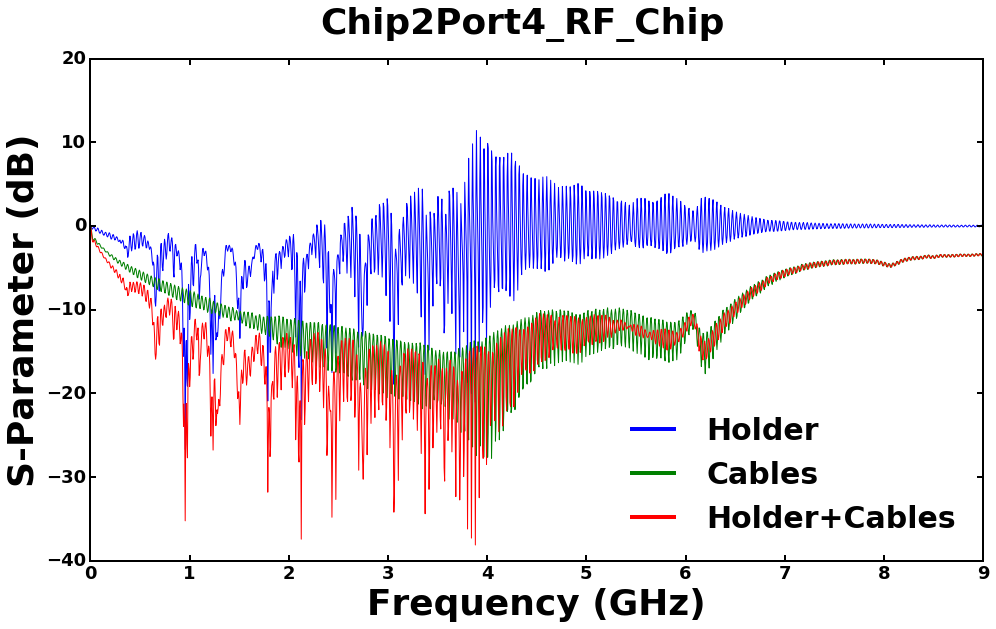

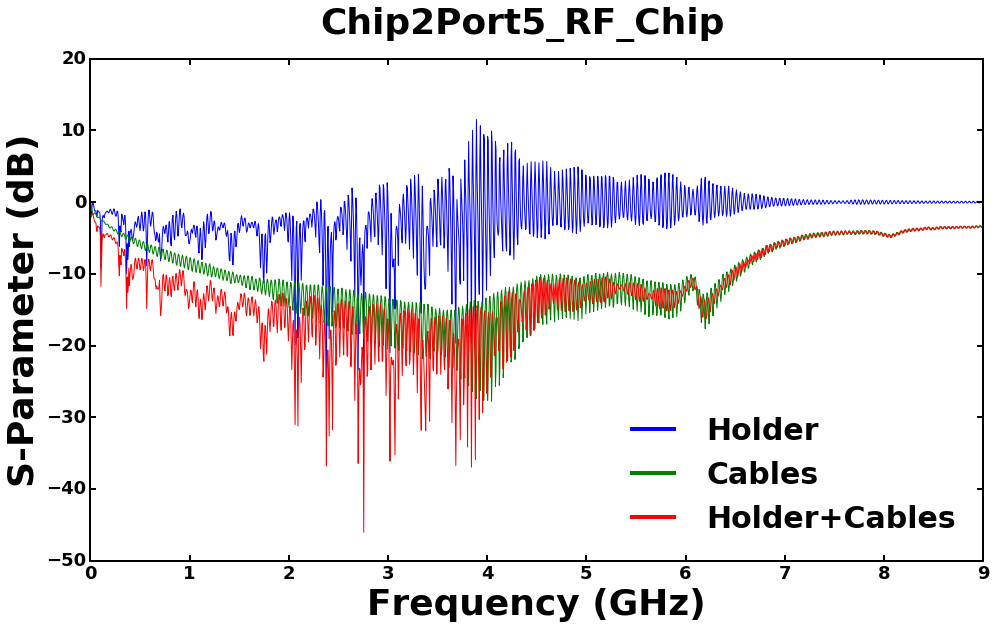

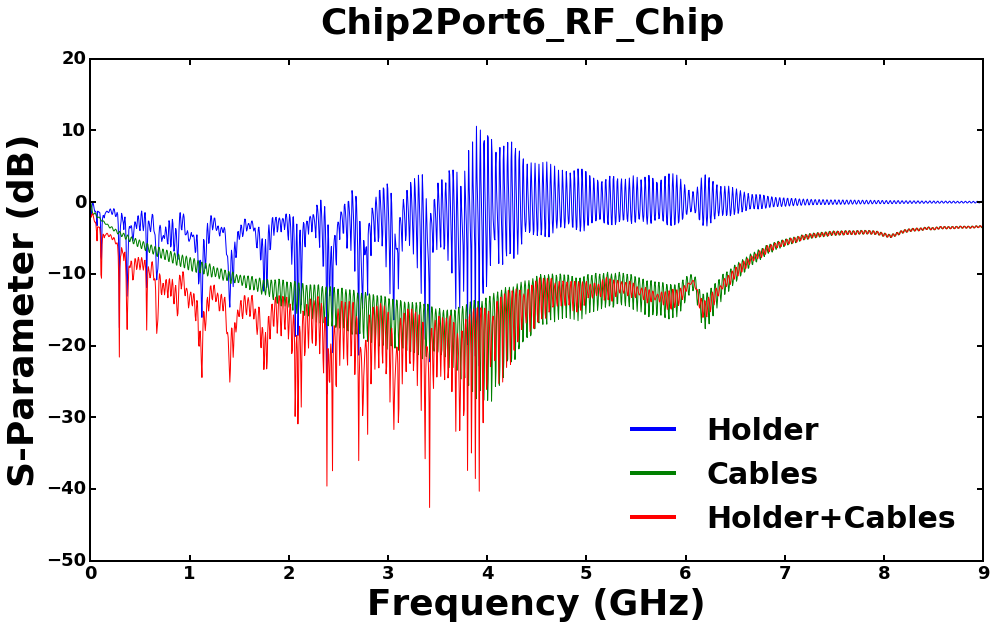

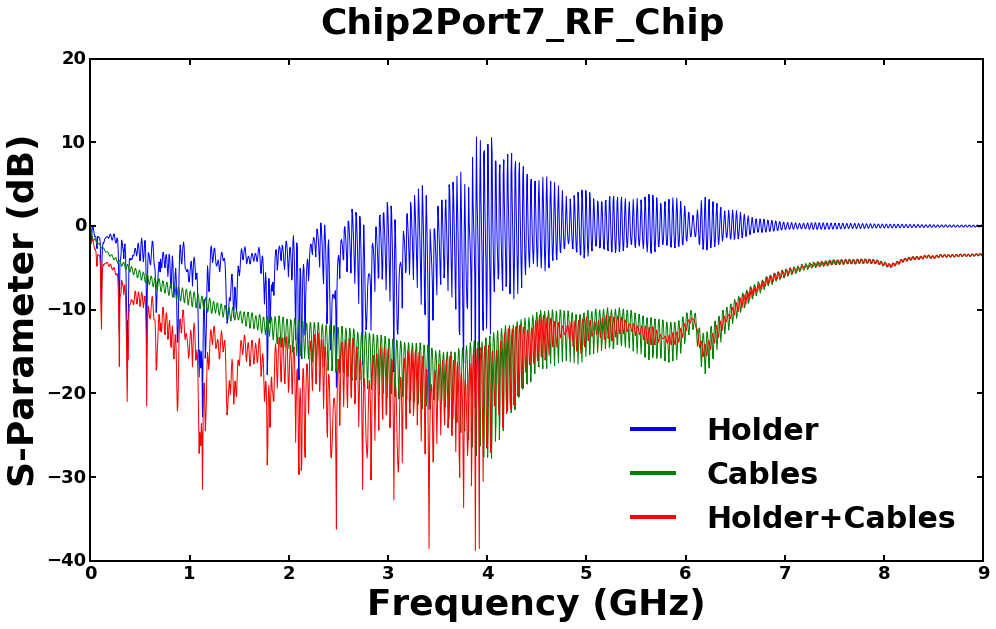

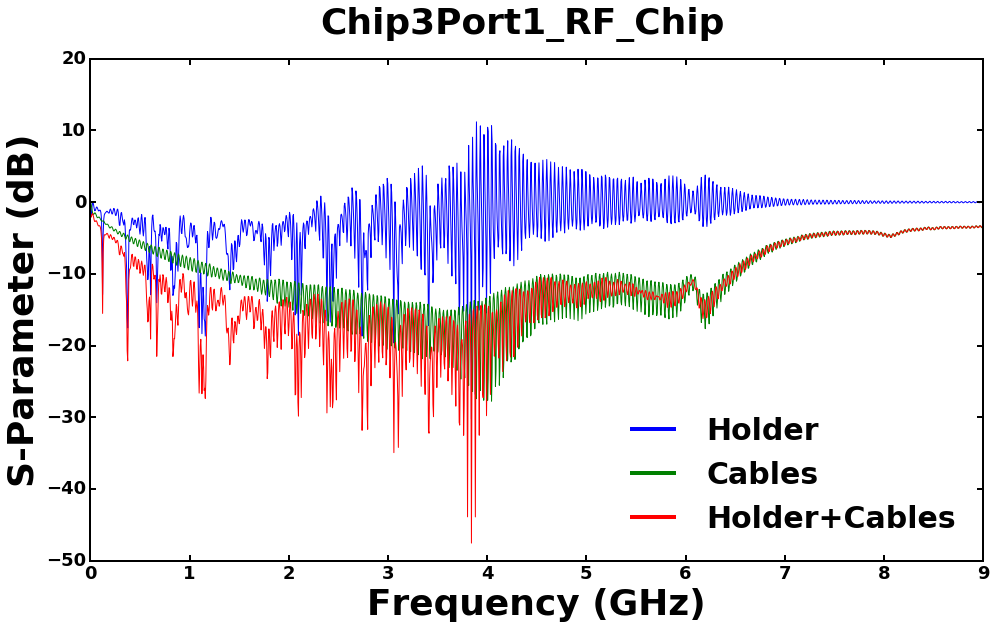

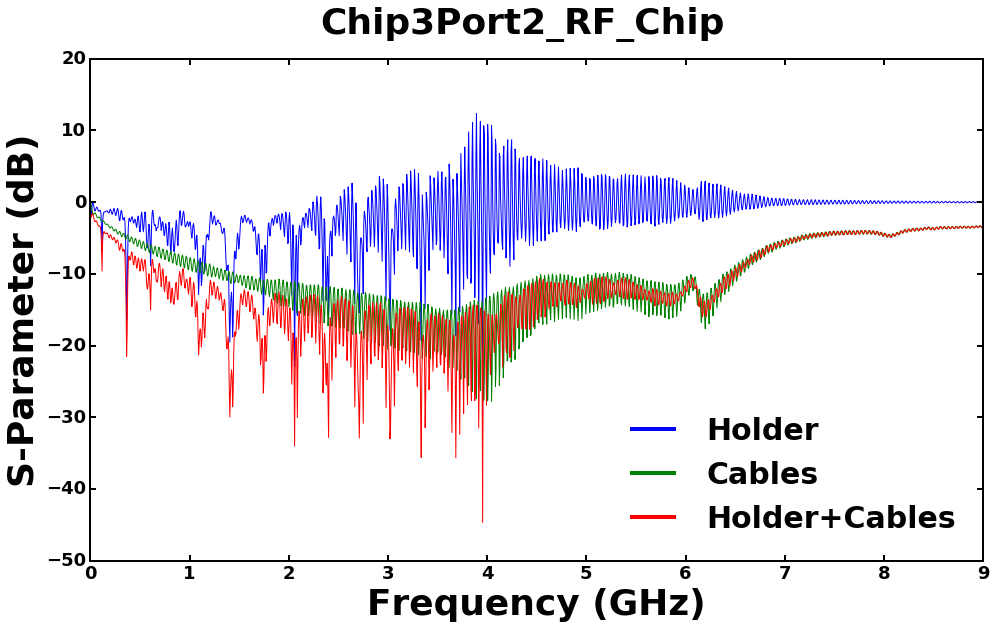

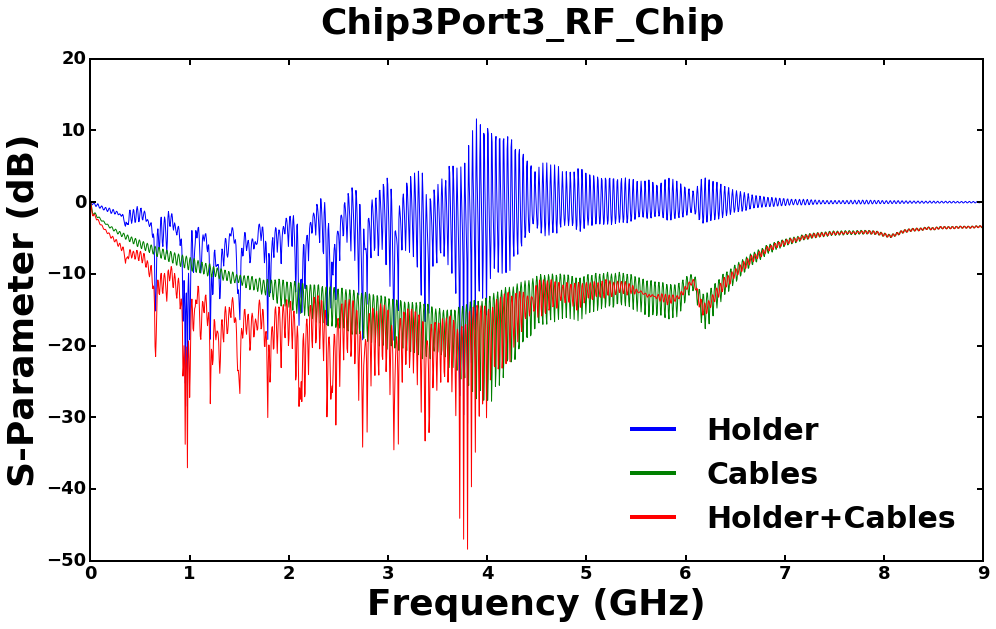

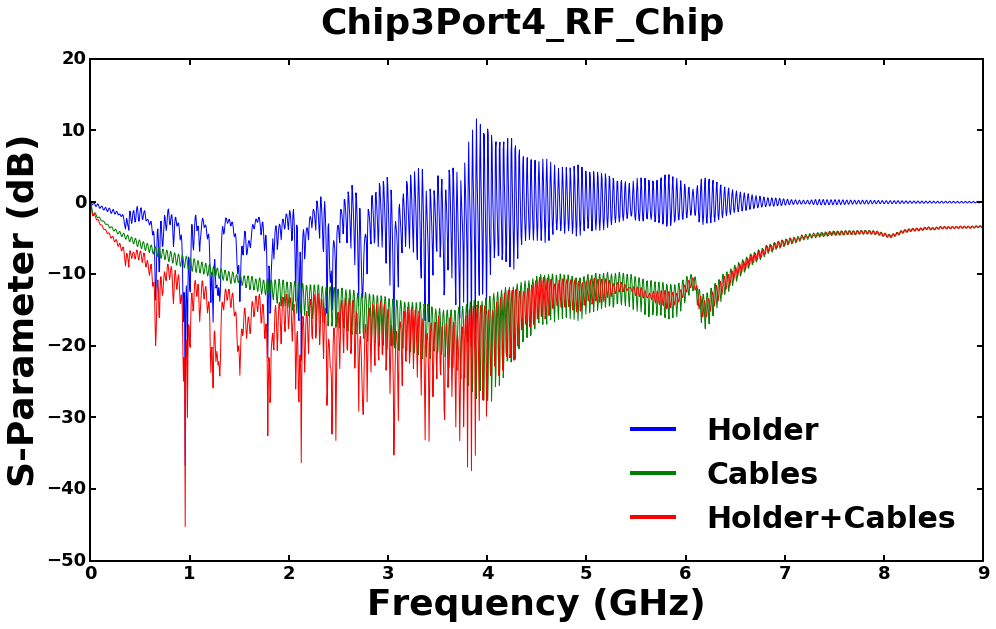

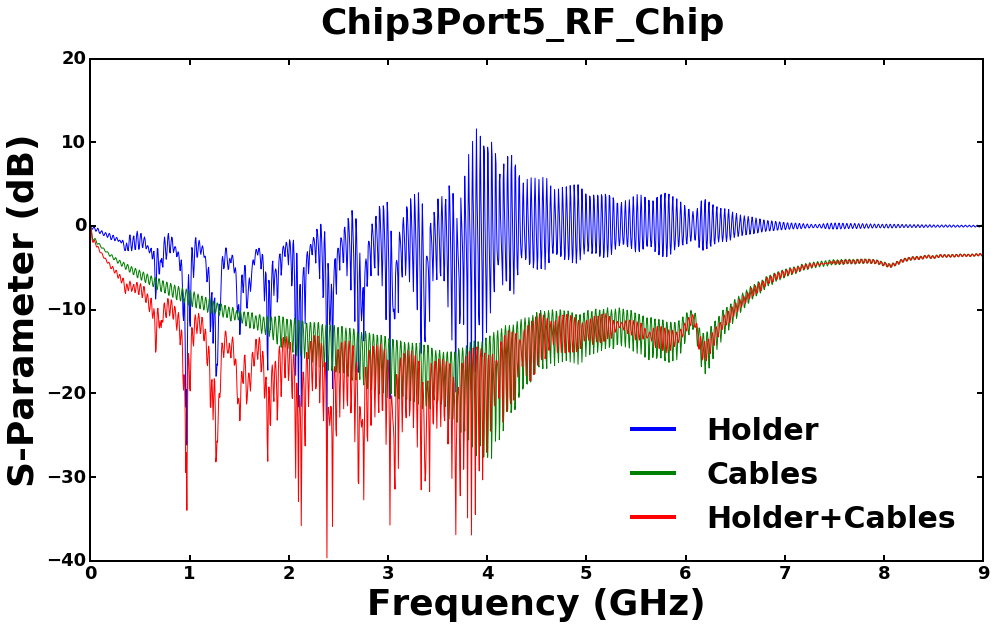

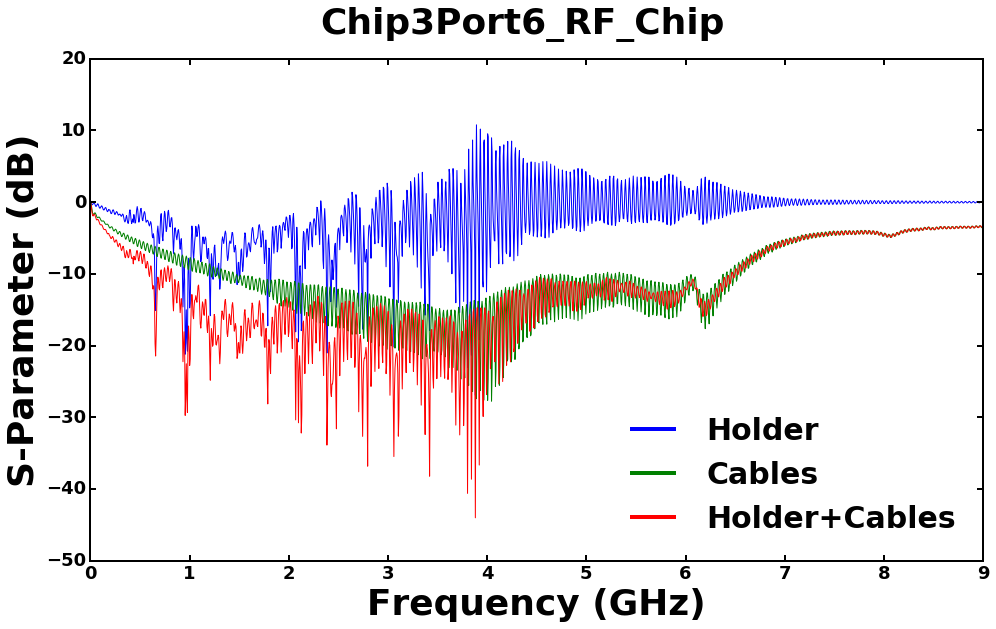

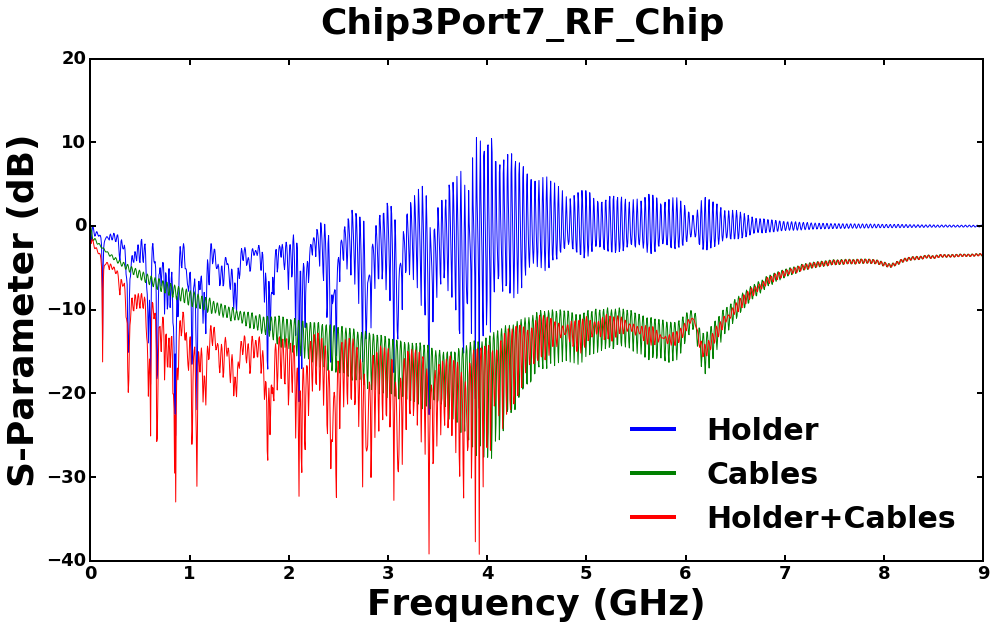

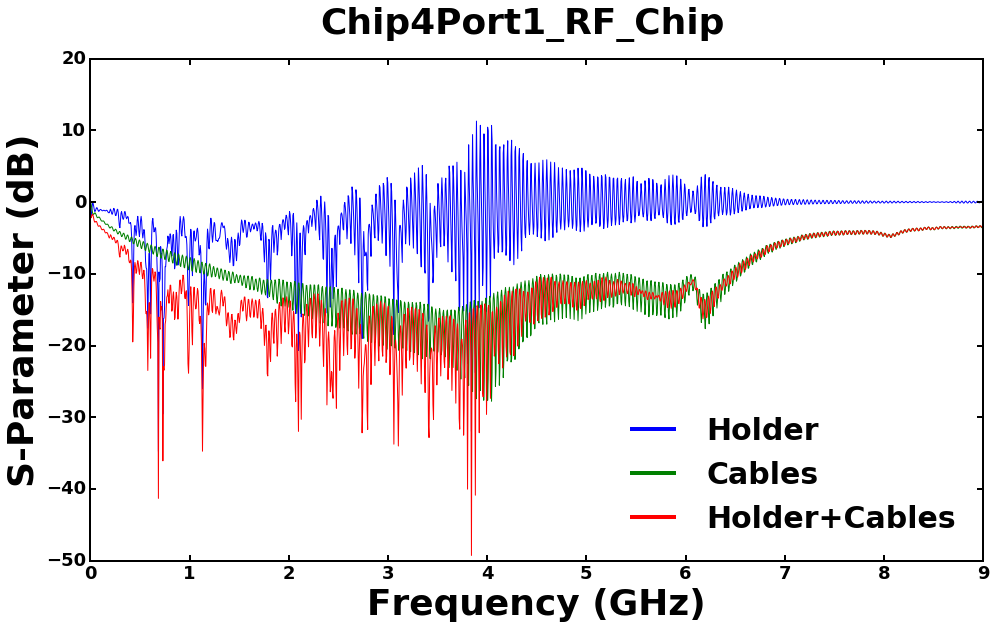

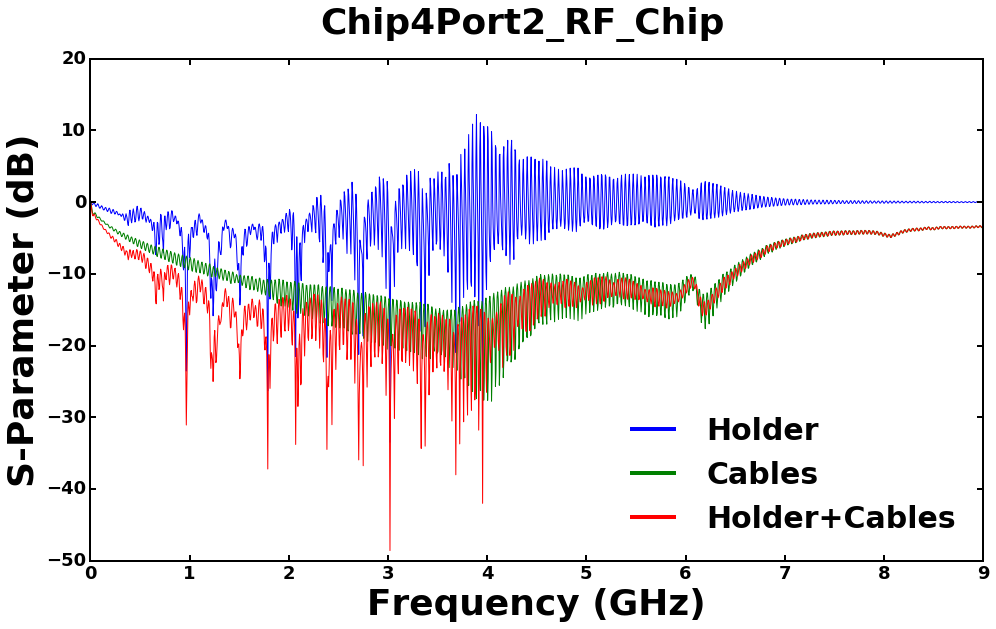

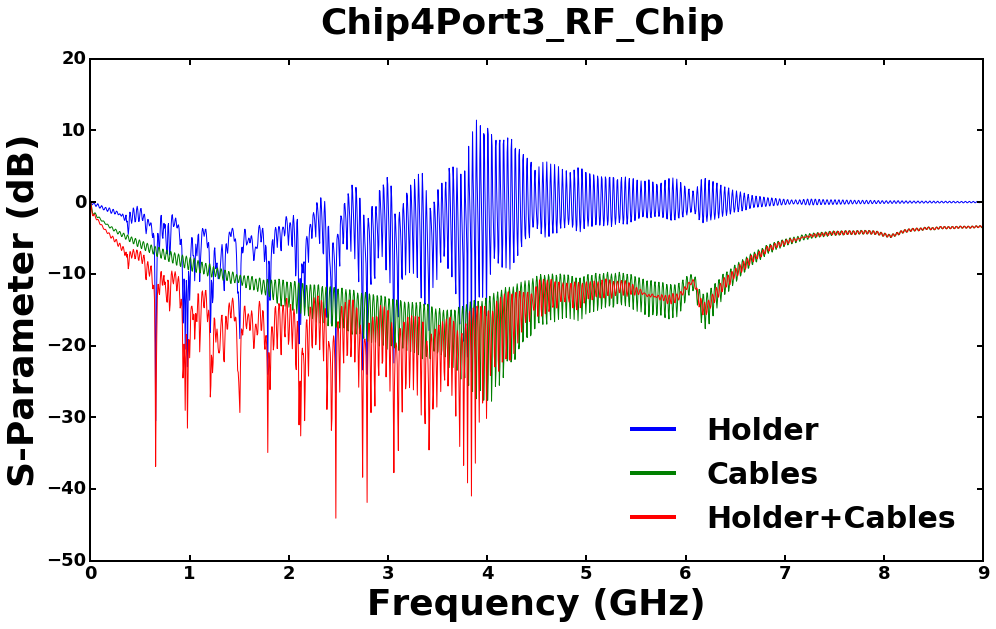

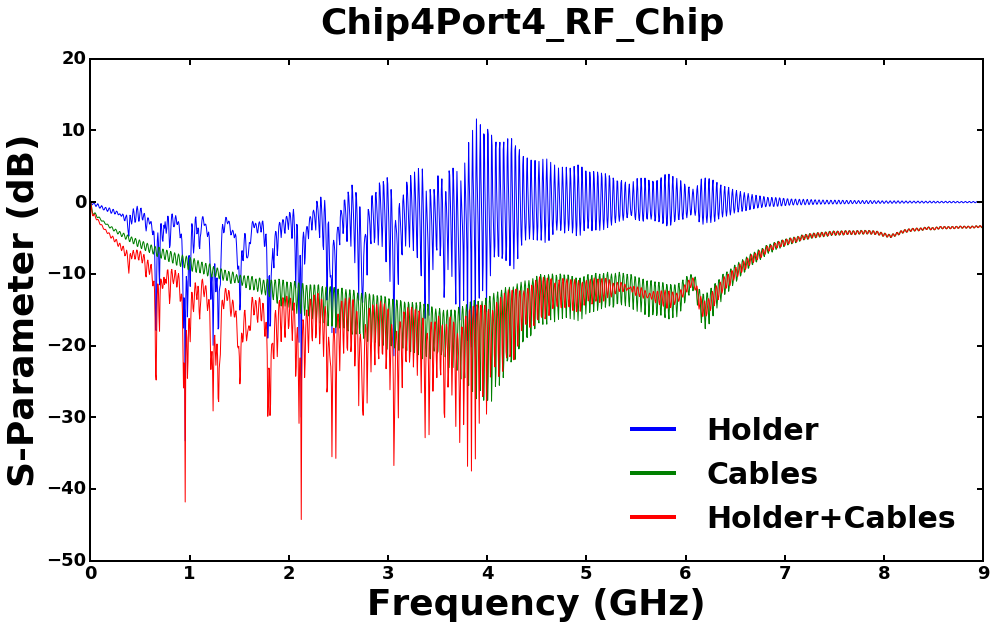

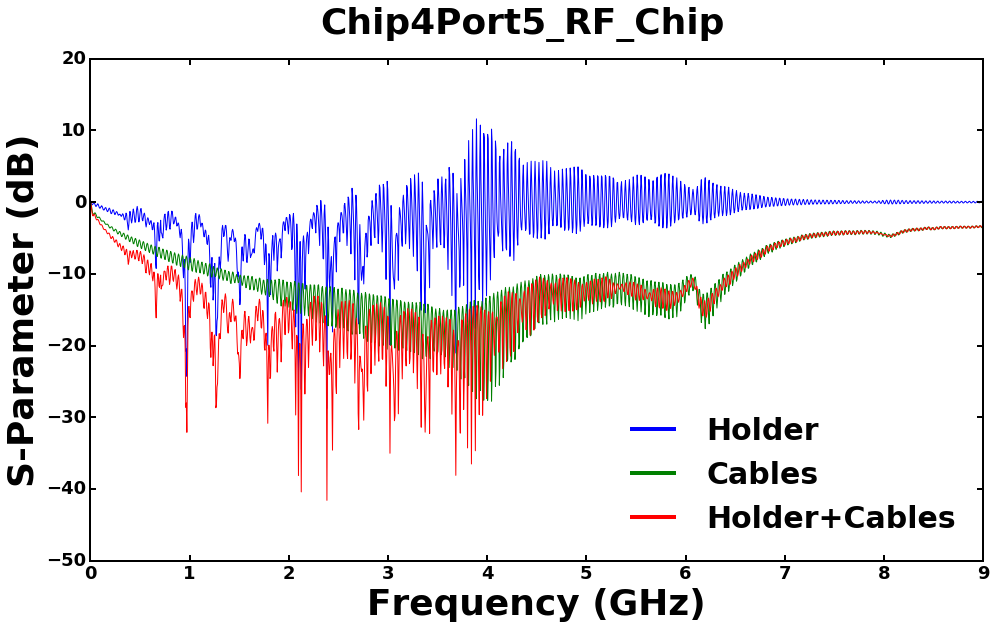

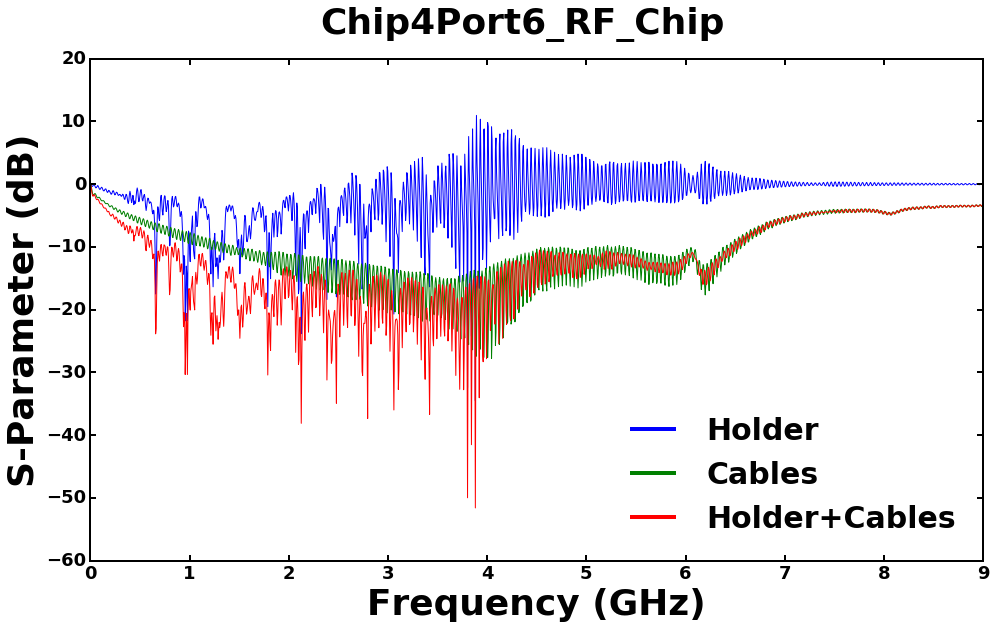

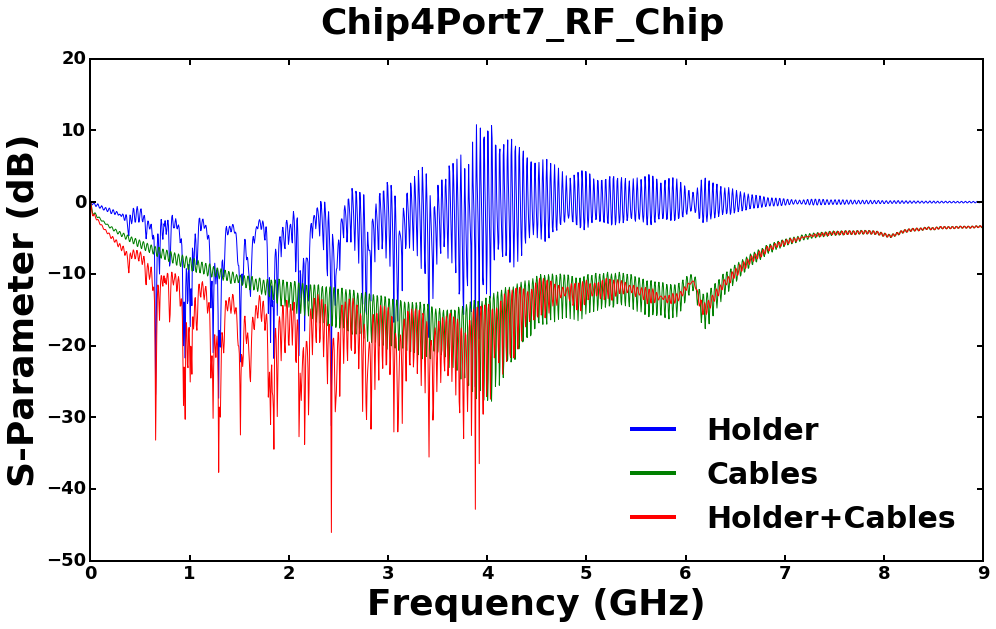

In [10]:
plot_file=np.arange(data_A.shape[2])
#data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
#data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments
for n in plot_file:
  
    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    x=data_array[:,0,n]
    y=data_array[:,1,0]
    x1=data_array[:,0,n]
    y1=data_array[:,1,n+1]
    X=data_array[:,0,n] #Used for plotting B experiments as data_B_R, R=1,2
    Y=data_A[:,1,n] #Used for plotting B experiments as data_B_R, R=1,2
    
    name_fix=plot_file[n]+1
    plot_file_name=str(name_fix)
    Data_Name = os.path.basename(file_list[n+1]).split('.')[0] + '_RF_Chip' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel('S-Parameter (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    fig=plt.plot(X,Y,'b-',label='Holder')
    fig=plt.plot(x,y,'g-',label='Cables')
    fig=plt.plot(x1,y1,'r-',label='Holder+Cables')
    
    leg=plt.legend(fontsize=30, loc='best', frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    #plt.show()
    save_loc=root.directory+'/'+Data_Name+'.png'
    plt.savefig(save_loc)

In [ ]:
save_loc

In [ ]:
data_A[0:10,0,1]

In [ ]:
data_array[1:30,1,1]-data_array[1:30,1,0]

In [ ]:
data_array[0,0,0]

In [ ]:
plot_file

In [ ]:
data_array[:,2,1]-data_array[:,2,0]

In [ ]:
os.path.basename(file_list[1]).split('.')[0]